         Date  Crop Yield (tonnes/hectare)  Temperature (°C)  Rainfall (mm)  \
0  2000-01-01                     3.882026         26.438078      98.097940   
1  2000-01-02                     3.200079         24.010572      24.584930   
2  2000-01-03                     3.489369         27.661552      71.050533   
3  2000-01-04                     4.120447         29.331502      50.511344   
4  2000-01-05                     3.933779         25.494952      47.877264   

   Soil Moisture (%)  
0          49.186576  
1          17.582955  
2          29.350942  
3          16.634146  
4          10.407233  


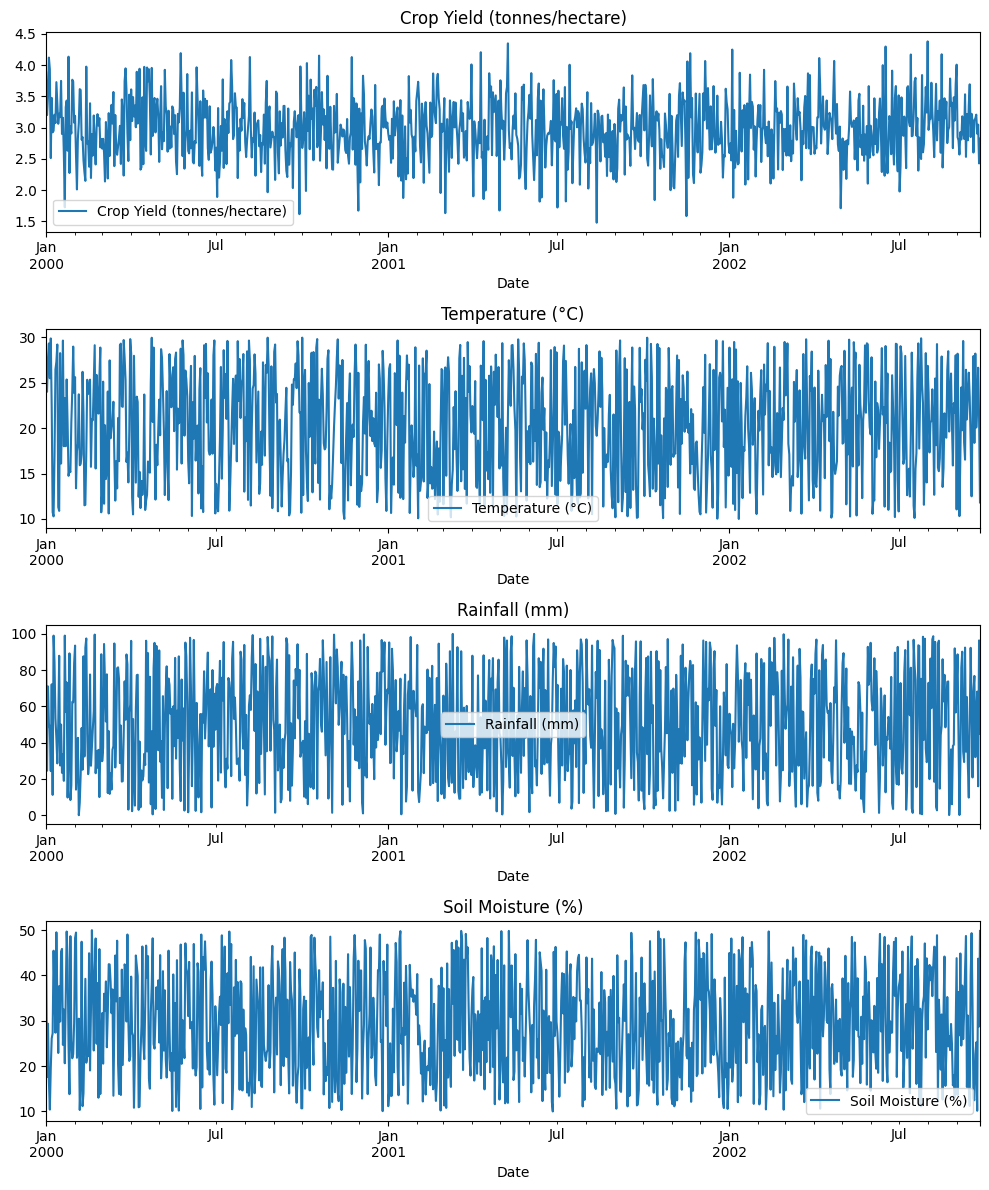

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/agriculture_time_series_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Adjusting the plotting to handle non-numeric columns
data['Date'] = pd.to_datetime(data['Date'])  # Convert the Date column to datetime
numeric_columns = data.select_dtypes(include=['number']).columns  # Select only numeric columns

# Plotting numeric columns
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, len(numeric_columns)*3))

for i, col in enumerate(numeric_columns):
    data.plot(x='Date', y=col, ax=axes[i], title=col)

plt.tight_layout()
plt.show()

In [5]:
# Performing basic data cleaning on the dataset

# 1. Checking for missing values
missing_values = data.isnull().sum()

# 2. Filling missing values (if any). Here, we will use forward fill for simplicity.
# This method is commonly used in time series where the previous value is a good estimate for the next one.
cleaned_data = data.fillna(method='ffill')

# 3. Checking for duplicates
duplicates = cleaned_data.duplicated().sum()
if duplicates > 0:
    cleaned_data = cleaned_data.drop_duplicates()

# Displaying the summary of cleaning steps
cleaning_summary = {
    "Missing Values Before Cleaning": missing_values,
    "Missing Values After Cleaning": cleaned_data.isnull().sum(),
    "Duplicates Removed": duplicates
}

cleaning_summary

{'Missing Values Before Cleaning': Date                           0
 Crop Yield (tonnes/hectare)    0
 Temperature (°C)               0
 Rainfall (mm)                  0
 Soil Moisture (%)              0
 dtype: int64,
 'Missing Values After Cleaning': Date                           0
 Crop Yield (tonnes/hectare)    0
 Temperature (°C)               0
 Rainfall (mm)                  0
 Soil Moisture (%)              0
 dtype: int64,
 'Duplicates Removed': 0}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


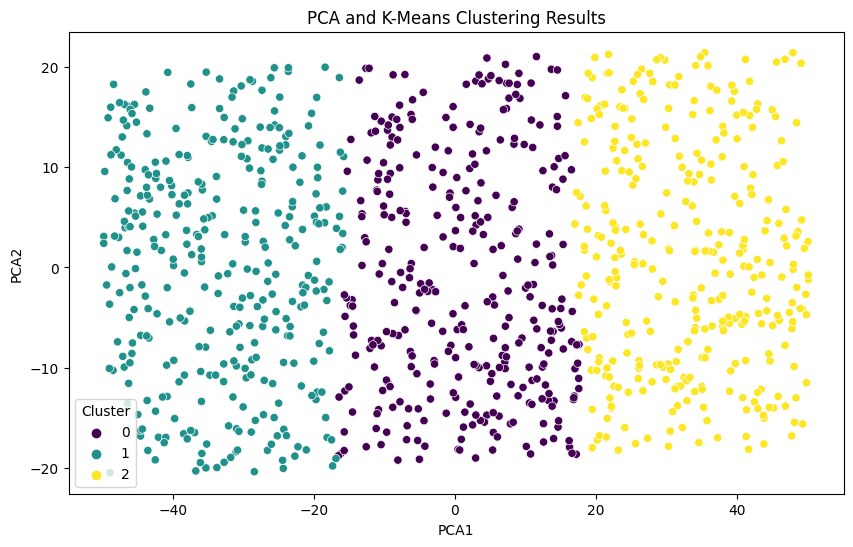

1    341
2    330
0    329
Name: Cluster, dtype: int64


In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/agriculture_time_series_dataset.csv'
data = pd.read_csv(file_path)

# Convert the Date column to datetime and select only numeric columns
data['Date'] = pd.to_datetime(data['Date'])
numeric_data = data.select_dtypes(include=['number'])

# PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
pca_result = pca.fit_transform(numeric_data)

# K-Means Clustering
kmeans = KMeans(n_clusters=3)  # Assuming 3 clusters for demonstration
clusters = kmeans.fit_predict(pca_result)

# Adding the cluster information to the PCA result for visualization
pca_result_with_clusters = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_result_with_clusters['Cluster'] = clusters

# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_result_with_clusters, palette='viridis')
plt.title('PCA and K-Means Clustering Results')
plt.show()

# Returning the number of items in each cluster
cluster_counts = pca_result_with_clusters['Cluster'].value_counts()
print(cluster_counts)